In [71]:
from PegRobot2D import Frontend
WINDOW_X = 1000
WINDOW_Y = 500
env = Frontend(WINDOW_X, WINDOW_Y, "RoboPeg2D Simulation", vsync = False, resizable = False, visible = False)

# Body Class

In [30]:
radius = 2
mass = 3
density = 3

s = pymunk.Space()
b = pymunk.Body()
c = pymunk.Circle(b, radius)

c.density = density

In [33]:
print(b.mass, b.moment)
s.add(b, c)
print(b.mass, b.moment)
s.remove(b, c) # Need to remove it in order to add it later on...

0.0 0.0
37.69911184307752 75.39822368615503


In [34]:
# Multiple shapes
b = pymunk.Body()

c1 = pymunk.Circle(b, radius, offset = (10,0))
c1.density = density
c2 = pymunk.Circle(b, radius, offset=(0,10))
c2.density = density
s.add(b, c1, c2)
print(b.mass, b.moment)

75.39822368615503 3920.7076316800617


In [35]:
s.bodies # List of bodies in the space

[Body(75.39822368615503, 3920.7076316800617, Body.DYNAMIC)]

## Velocity functions 

### Zero Gravity

In [55]:
# Callback for gravity
space = pymunk.Space()
space.gravity = 0, 10 # Vec2d
body = pymunk.Body(mass = 1, moment = 2)
space.add(body)

def zero_gravity(body, gravity, damping, dt):
    pymunk.Body.update_velocity(body, (10,-10), damping, dt)
    
body.velocity_func = zero_gravity

space.step(0.1)
print(body.position, body.velocity)

space.step(0.1)
print(body.position, body.velocity)

space.step(0.1)
print(body.position, body.velocity)

Vec2d(0.0, 0.0) Vec2d(1.0, -1.0)
Vec2d(0.1, -0.1) Vec2d(2.0, -2.0)
Vec2d(0.30000000000000004, -0.30000000000000004) Vec2d(3.0, -3.0)


### Limit Velocity

In [46]:
body = pymunk.Body(mass = 1, moment = 2)

def limit_velocity(body, gravity, damping, dt):
    max_velocity = 1000
    pymunk.Body.update_velocity(body , gravity, damping, dt) # Updates velocity of a body using euler integration
    l = body.velocity.length # Magnitude of velox
    if l > max_velocity:
        scale = max_velocity / l
        body.velocity = body.velocity * scale # Same as doing boddy.velocity = max_velocity

body.velocity_func = limit_velocity

In [65]:
body.body_type # he type of a body (Body.DYNAMIC, Body.KINEMATIC or Body.STATIC)

0

In [67]:
body.force = 0,0

In [81]:
space.step(0.1)
print(body.position, body.velocity)

Vec2d(13.73, -13.340000000000003) Vec2d(17.1, -16.8)


In [91]:
body.force = 0,0
body.is_sleeping # boolean
body.kinetic_energy
body.velocity
body.torque
body.world_to_local(v = (1,1)) #Distannce vector from world to a local position vector V

Vec2d(-12.73, 14.340000000000003)

In [93]:
body.position

Vec2d(13.73, -13.340000000000003)

In [100]:
body.velocity_at_world_point(point=body.position)

Vec2d(17.1, -16.8)

# Shape Class

Base class for pymunk.Shape is pymunk._picle.PickleMixin, object.

Use specialised shape to intitialise instances directly..

__init__(shape=None)

Shapes are attached usually attached to bodies, unless shape.body is set to None

In [114]:
Shape = pymunk.Shape(shape=pymunk.Circle(body = body , radius = 3, offset = (0,0)))
Shape.cache_bb() # update and return bounding box of this shape

### useful for multiple sets of shapes attached together
Shape.center_of_gravity
Shape.density 
Shape.mass
Shape.moment

Shape.collision_type # User defined type of collision
Shape.bb # Bounding box, need to call Shape.cache_bb() and Space.step() before this can be called

### Contact & Collision parameters
Shape.elsaticity # Allows some deformation and bounce. 0.0 gives no bounce, 1.0 gives perfect bounce.

Shape.friction # Coefficient of friction

Shape.point_query(point) # Chcks if the given point lies within the shape, negative distance means it's within :)

Shape.segment_query(start, end, radius = 0) # Check if the line segment froms start to end intersects the shape.
#Useful for bullets

Shape.space # which space it has been added to

### Typical Shapes

class pymunk.Circle(body, radius, offset=(0, 0)) is a child of class Shape 

class pymunk.Poly(body, vertices, transform=None, radius=0) is also a child of class Shape 
    Slowest shape but most flexible
    
NOTE make sure to put vertices around (0,0)

It is legal to send in None as body argument to indicate that this shape is not attached to a body. However, you must attach it to a body before adding the shape to a space or used for a space shape query.

In [3]:
# Place directly
w, h = 10, 20
vs = [(-w/2, -h/2), (w/2,-h/2), (w/2,h/2), (-w/2,h/2)]
poly_good = pymunk.Poly(None, vs, radius = 1) 
print((poly_good.center_of_gravity.x, poly_good.center_of_gravity.y))
# adding a small radius in the vertices can significantly reduce problems where the poly gets stuck in geometry

(0.0, 0.0)


In [4]:
# Or use a transform
width, height = 10, 20
vs = [(0, 0), (width, 0), (width, height), (0, height)]
poly_bad = pymunk.Poly(None, vs)
print((poly_bad.center_of_gravity.x, poly_bad.center_of_gravity.y))

# Transform
t = pymunk.Transform(tx=-width/2, ty=-height/2)
poly_good = pymunk.Poly(None, vs, transform=t)
print((poly_good.center_of_gravity.x, poly_good.center_of_gravity.y))

(5.0, 10.0)
(0.0, 0.0)


In [6]:
poly_good.body # None
poly_good.collision_type # 0 atm

0

In [10]:
poly_good.create_box(body = None, size=(10, 10), radius=0)
# Convenience function to create a box given a width and height.
# The boxes will always be centered at the center of gravity of the body you are attaching them to. 

# Can also create this from the bb
poly_good.create_box_bb(body=None, bb=poly_good.bb, radius=0)

### Vertices

In [12]:
poly_good.get_vertices()

[Vec2d(-5.0, -10.0), Vec2d(5.0, -10.0), Vec2d(5.0, 10.0), Vec2d(-5.0, 10.0)]

In [18]:
b = pymunk.Body()
b.position = 1,2
b.angle = 0.5
shape = pymunk.Poly(b, [(0,0), (10,0), (10,10)])

# Get the vertices in global coordinates because get_vertices gets the vertices in LOCAL COORDINATES!
for v in shape.get_vertices():
    x,y = v.rotated(shape.body.angle) + shape.body.position
    print('Vertex Coordinate', int(x), int(y))

Vertex Coordinate 1 2
Vertex Coordinate 9 6
Vertex Coordinate 4 15


In [19]:
import collections

In [21]:
Person = collections.namedtuple('Person','name age gender')

In [26]:
bob = Person(name = 'bob', age = 30, gender = 'male')
jane = Person(name = 'jane', age = 29, gender = 'female')

In [29]:
for p in [bob, jane]:
    print(p.age)

30
29


### Segments

Bases: pymunk.shapes.Shape

Mainly a static 2D line can be beveled into thickness. 

__init__(body, a, b, radius)
Body -> body attached to it
a, b first and second endpoints
radius: (float) thickness of segment

Special __methods__

    set_neighbors(prev, next) avoid crack forming in ensemble of segments 

## Contacts

$class pymunk.SegmentQueryInfo$

The properties are as follows

shape Shape that was hit, or None if no collision occured

point The point of impact.

normal The normal of the surface hit.

alpha The normalized distance along the query segment in the range [0, 1]

###############################################################

$class pymunk.ContactPoint(point_a, point_b, distance)$

$class pymunk.ContactPointSet(normal, points)$

Bases: object

distance is the penetration distance of the two shapes. Overlapping means it will be negative.<

### Arbiter

Encapsulates a pair of colliding shapes and all the data about their collision. It is created when objects collide and deleted when no longer in collision.

contact_point_set -> contact poitns ets getting contact info


# Basic Tutorial Examples

In [5]:
def f1(func):
    def wrapper(*args, **kwargs):
        print("started")
        func(*args, **kwargs)
        print("Ended")

    return wrapper

@f1
def f(a, b=9):
    print(a, b)
    
def add(x,y):
    return x + y

# Decorators are very useful for example, can add decorator functions whichh:
    # Time a function call
    # Log a function call
    # Multithread a function etc...

## Pymunk Sandbox

In [1]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import pymunk
from pymunk.vec2d import Vec2d
import pymunk.matplotlib_util

Loading chipmunk for Windows (64bit) [C:\Users\Alvaro\Anaconda3\lib\site-packages\pymunk\chipmunk.dll]


In [4]:
def setup_space():
    space = pymunk.Space()
    space.gravity = 0,-9820
    space.damping = 0.99
    return space

def setup_balls(space):
    width = 600
    height = 600
    for x in range(-100,150,50):
        x += width / 2
        offset_y = height/2
        mass = 10
        radius = 25
        moment = pymunk.moment_for_circle(mass, 0, radius, (0,0))
        body = pymunk.Body(mass, moment)
        body.position = x, -125+offset_yfig = plt.figure()
ax = plt.axes(xlim=(0, 600), ylim=(0, 600))
ax.set_aspect("equal")

space = setup_space()
setup_balls(space)

o = pymunk.matplotlib_util.DrawOptions(ax)


space.shapes[1].body.apply_impulse_at_local_point((-12000,0))
    
def init():
    space.debug_draw(o)
    return []

def animate(dt):
    #we run the animation with half speed intentionally to make it a little nicer to look at
    for x in range(10):
        space.step(1/50/10/2)
    ax.clear()
    space.debug_draw(o)
    return []

frames = 105
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, interval=20, blit=False)

HTML(anim.to_html5_video())
        body.start_position = Vec2d(body.position)
        shape = pymunk.Circle(body, radius)
        shape.elasticity = 0.9999999
        space.add(body, shape)
        pj = pymunk.PinJoint(space.static_body, body, (x, 125+offset_y), (0,0))
        space.add(pj)

In [9]:
import pymunk
from pymunk.autogeometry import march_soft
img = [
    "  xx   ",
    "  xx   ",
    "  xx   ",
    "  xx   ",
    "  xx   ",
    "  xxxxx",
    "  xxxxx",
]
segments = []

def segment_func(v0, v1):
    segments.append((tuple(v0), tuple(v1)))
def sample_func(point):
    x = int(point.x)
    y = int(point.y)
    return 1 if img[y][x] == "x" else 0

march_soft(pymunk.BB(0,0,6,6), 7, 7, .5, segment_func, sample_func)
print(len(segments))

13


{<pymunk.constraint.PinJoint at 0x2d6b51a4898>,
 <pymunk.constraint.PinJoint at 0x2d6b54d3630>}

In [31]:
import pyglet
import pymunk
from pymunk import constraint
from pymunk.pyglet_util import DrawOptions
from pyglet.window import key, FPSDisplay
from math import degrees
from pymunk import Vec2d
import numpy as np

WINDOW_X = 1280
WINDOW_Y = 720
ORIGIN = (280.0, 300.0) # Robot gripper origin

space = pymunk.Space()
space.gravity = (0, 0) # Gravity-less 2D simulation (2D robot operating on x,y plane)
space.damping = 0.95
    
class Environment:
    def __init__(self, sprites = None):
        self.sprites = sprites

    def add_static_segment(self, position, endpoint_e, radius = 3.0, elasticity = 0.8, friction = 0.7):
        """
        *args
            endpoint_s -- Vec2D argument
            endpoint_e -- Vec2D argument
            elasticity [0, 1]
            friction [0, 1]
        ** kwargs
            radius
            Elasticity
            friction
        """
        # Make a static segment (floor)
        segment_shape = pymunk.Segment(space.static_body, (0, 0), endpoint_e, radius)
        #segment_shape.id = 1
        segment_shape.body.position = position
        segment_shape.elasticity = elasticity
        segment_shape.friction = friction
        segment_shape.set_neighbors(endpoint_e, position)

        space.add(segment_shape)

    def make_static_env(self):
        """
        seg_list is a list of tuples containing args for add_static_segment
        """

        # Static Coordinates for peg
        peg_pos_x = 1000
        mid_frame = 360
        peg_girth = 40
        peg_depth = 200

        seg_list = [(Vec2d(peg_pos_x,0),Vec2d(0,mid_frame - peg_girth//2)),
                     (Vec2d(peg_pos_x,mid_frame - peg_girth//2),Vec2d(peg_depth,0)),
                     (Vec2d(peg_pos_x + peg_depth,mid_frame - peg_girth//2),Vec2d(0,peg_girth)),
                     (Vec2d(peg_pos_x + peg_depth,mid_frame + peg_girth//2),Vec2d(-peg_depth,0)),
                     (Vec2d(peg_pos_x,mid_frame + peg_girth//2),Vec2d(0,WINDOW_Y - mid_frame - peg_girth//2))]

        for segment in seg_list:
            self.add_static_segment(*segment)

    def make_dynamic_env(self):
        pass

class Arms:
    def __init__(self, arm_lengths, thickness = 4, radii = [4,4,9]):
        self.lengths = arm_lengths
        self.n = len(self.lengths)
        self.radii = radii
        self.thickness = thickness
        self.pos = []
        self.arm_vecs = []
        
class PivotJoint:
    def __init__(self, b, b2, a=(0, 0), a2=(0, 0), collide=True):
        joint = pymunk.constraint.PinJoint(b, b2, a, a2)
        joint.collide_bodies = collide
        space.add(joint)
        
class Segment:
    def __init__(self, p0, v, radius=10):
        self.body = pymunk.Body()
        self.body.position = p0
        shape = pymunk.Segment(self.body, (0, 0), v, radius)
        shape.density = 0.1
        shape.elasticity = 0.5
        shape.filter = pymunk.ShapeFilter(group=1)
        shape.color = (0, 255, 0, 0)
        space.add(self.body, shape)
        
class RobotEnvironment:
    def __init__(self, arm_lengths):
        self.state = None 
        self.Arms = Arms(arm_lengths)
        self.random_arm_generator()
        self.PivotPoints = [(ORIGIN,0)]

    def random_arm_generator(self):
        for idx in range(self.Arms.n):
            rand_angle = np.random.random_sample()*np.pi/2 - np.pi/4
            length = self.Arms.lengths[idx]
            self.Arms.pos.append((length, rand_angle))

    def get_vertices(self, arm_data):
        thc = self.Arms.thickness
        return [(-arm_data[0]//2,-thc),(arm_data[0]//2,-thc),(arm_data[0]//2,thc),(-arm_data[0]//2,thc)]

    def get_pos(self, arm_data, idx):
        self.arm_vector_curr = Vec2d((arm_data[0]*np.cos(arm_data[1]), arm_data[0]*np.sin(arm_data[1])))
        self.Arms.arm_vecs.append(self.arm_vector_curr)
        if idx is 0:
            self.point_a = ORIGIN
        else:
            self.point_a = self.point_b 
        self.point_b = self.point_a + self.arm_vector_curr
        return self.point_a + self.arm_vector_curr//2

    def get_transform(self, arm_data):
        t = pymunk.Transform(a = np.cos(arm_data[1]), c = -np.sin(arm_data[1]), tx = 0,
                             b = np.sin(arm_data[1]), d = np.cos(arm_data[1]), ty = 0)
        return t

    def save_pivot(self, idx):
        self.PivotPoints.append((self.point_a + self.arm_vector_curr, idx))
        
    def reset_bodies(self):
        for body in space.bodies:
            if not hasattr(body, 'start_position'):
                continue
            body.position = Vec2d(body.start_position)
            body.force = 0, 0
            body.torque = 0
            body.velocity = 0, 0
            body.angular_velocity = 0
            body.angle = body.start_angle

    def init_robot(self):
        
        self.bodies = []
        
        b0= space.static_body
        b0.id = 'root'
#         space.add(b0)
        self.bodies.append(b0)
#         body = pymunk.Body(body_type = pymunk.Body.STATIC)
#         body.position = ORIGIN
#         shape = pymunk.Circle(body, radius = 0.2)
#         shape.filter = pymunk.ShapeFilter(group = 1)
#         space.add(shape, shape.body)
#         self.bodies.append(body)
        
        for idx, arm_data in enumerate(self.Arms.pos):
            vertices = self.get_vertices(arm_data)
            pos = self.get_pos(arm_data, idx)
            t = self.get_transform(arm_data)
            self.save_pivot(idx+1)
            
            body = pymunk.Body()
            body.position = pos
            body.id = f'arm{idx+1}'
             
            shape = pymunk.Poly(body, vertices, t,  radius = self.Arms.radii[idx])
            shape.filter = pymunk.ShapeFilter(group = 1)
            shape.elasticity = 0.5
            shape.color = (0, 255, 0, 0)
            shape.friction = 0.9
            shape.density = 1
            
            space.add(body, shape)
            self.bodies.append(body)
        
        self.add_constraints()
        
    def add_constraints(self):

        for idx, body in enumerate(self.bodies):
            if idx < len(self.bodies) - 1:
                print(f"Pivoing at {self.PivotPoints[idx][0]}")
                print(body, self.bodies[idx + 1])
                PivotJoint(body, self.bodies[idx + 1], body.world_to_local(self.PivotPoints[idx][0]),
                           self.bodies[idx+1].world_to_local(self.PivotPoints[idx][0]))

    def get_state(self):
        return [angle[1] for angle in self.Arms.pos]
    
def coll_begin(arbiter, space, data):
    print('New Collision')
    pass
    return True

def coll_pre(arbiter, space, data):
    print('Preprocess collision')
    """First touch"""
    return True

def coll_post(arbiter, space, data):
    print('Postprocess collision')
    """Calls during contact"""
    pass

def coll_separate(arbiter, space, data):
    """Calls when objects are not touching"""
    print('No more collision')
    pass

# handler = space.add_default_collision_handler()
# handler.begin = coll_begin
# handler.pre_solve = coll_pre
# handler.post_solve = coll_post
# handler.separate = coll_separate

class GameWindow(pyglet.window.Window):
    def __init__(self,*args,**kwargs):
        super().__init__(*args,**kwargs)
        self.fps = FPSDisplay(self)
        self.space = space
        self.options = DrawOptions()

    def on_key_press(self,symbol, modifiers):
        if symbol == key.UP:
    #         print('UP')
            self.space.bodies[-1].velocity.y += 600
        elif symbol == key.DOWN:
    #         print('DOWN')
            self.space.bodies[-1].velocity.y -= 600
        elif symbol == key.LEFT:
    #         print('LEFT')
            self.space.bodies[-1].velocity.x -= 600
        elif symbol == key.RIGHT:
    #         print('RIGHT')
            self.space.bodies[-1].velocity.x += 600
    
    def on_draw(self):
        self.clear() # clear the buffer
        # Order matters here!
        self.space.debug_draw(self.options)
        self.fps.draw()

    def on_mouse_press(self,x, y, button, modifier):
        print(x,y)
        point_q = space.point_query_nearest((x,y), 0, pymunk.ShapeFilter())
        if point_q:
            print(point_q.shape, point_q.shape.body)
    
    def update(self, dt):
        for r in range(10):
            space.step(dt)
        
if __name__ == "__main__":
    window = GameWindow()
    env = Environment()
    robo = RobotEnvironment([200.0,200.0,200.0])
    env.make_static_env()
    robo.init_robot()
    pyglet.clock.schedule_interval(window.update, 1.0/60)
    pyglet.app.run()

Pivoing at (280.0, 300.0)
Body(Body.STATIC) Body(3314.2654824574365, 11065227.690764561, Body.DYNAMIC)
Pivoing at Vec2d(479.4692377027735, 314.5610168008435)
Body(3314.2654824574365, 11065227.690764561, Body.DYNAMIC) Body(3314.2654824574374, 11065227.690764563, Body.DYNAMIC)
Pivoing at Vec2d(670.3594517579219, 254.8875203557747)
Body(3314.2654824574374, 11065227.690764563, Body.DYNAMIC) Body(5598.469004940774, 18691421.851162262, Body.DYNAMIC)


In [26]:
space.bodies

[Body(Body.KINEMATIC), Body(Body.KINEMATIC), Body(Body.KINEMATIC)]

In [23]:
space.bodies

[Body(191.41592653589794, 165893.8029977782, Body.DYNAMIC),
 Body(191.41592653589794, 165893.8029977782, Body.DYNAMIC),
 Body(351.415926535898, 960536.8658647877, Body.DYNAMIC)]

In [9]:
c2.body.position

Vec2d(360.0, 190.0)

In [1]:
import pyglet
import pymunk
import pymunkoptions
from pymunk import constraint
from pymunk.pyglet_util import DrawOptions
from pyglet.window import key, FPSDisplay
from math import degrees
from pymunk import Vec2d
from numpy import cos, sin
from numpy.random import random_sample
from numpy import pi as np_pi
import numpy as np
import functools

pymunkoptions.options["debug"] = False

# Meta Variables
WINDOW_X = 1280
WINDOW_Y = 720
ORIGIN = (450.0, 360.0) # Robot gripper origin

class StaticEnvironment:
    def __init__(self, space, sprites = None):
        self.sprites = sprites
        self.space = space
        self.make_static_env()

    def add_static_segment(self, position, endpoint_e, radius = 3.0, elasticity = 0.8, friction = 0.7):
        """
        *args
            endpoint_s -- Vec2D argument
            endpoint_e -- Vec2D argument
            elasticity [0, 1]
            friction [0, 1]
        ** kwargs
            radius
            Elasticity
            friction
        """
        # Make a static segment (floor)
        segment_shape = pymunk.Segment(self.space.static_body, (0, 0), endpoint_e, radius)
        #segment_shape.id = 1
        segment_shape.body.position = position
        segment_shape.elasticity = elasticity
        segment_shape.friction = friction
        segment_shape.set_neighbors(endpoint_e, position)

        self.space.add(segment_shape)

    def make_static_env(self):
        """
        seg_list is a list of tuples containing args for add_static_segment
        """

        # Static Coordinates for peg
        peg_pos_x = 1000
        mid_frame = 360
        peg_girth = 40
        peg_depth = 200

        seg_list = [(Vec2d(peg_pos_x,0),Vec2d(0,mid_frame - peg_girth//2)),
                     (Vec2d(peg_pos_x,mid_frame - peg_girth//2),Vec2d(peg_depth,0)),
                     (Vec2d(peg_pos_x + peg_depth,mid_frame - peg_girth//2),Vec2d(0,peg_girth)),
                     (Vec2d(peg_pos_x + peg_depth,mid_frame + peg_girth//2),Vec2d(-peg_depth,0)),
                     (Vec2d(peg_pos_x,mid_frame + peg_girth//2),Vec2d(0,WINDOW_Y - mid_frame - peg_girth//2))]

        for segment in seg_list:
            self.add_static_segment(*segment)

class Arms:
    def __init__(self, arm_lengths, thickness = 4, radii = [5,5,10]):
        self.lengths = arm_lengths
        self.n = len(self.lengths)
        self.radii = radii
        self.thickness = thickness
        self.pos = [None]*self.n
        self.arm_vecs = [None]*self.n

class PivotJoint:
    def __init__(self, space, b, b2, a=(0, 0), a2=(0, 0), collide=True):
        joint = pymunk.constraint.PinJoint(b, b2, a, a2)
        joint.collide_bodies = collide
        self.joint = joint
        space.add(joint)

class Segment:
    def __init__(self, space, p0, v, radius=10):
        self.body = pymunk.Body()
        self.body.position = p0
        shape = pymunk.Segment(self.body, (0, 0), v, radius)
        shape.density = 0.1
        shape.elasticity = 0.5
        shape.filter = pymunk.ShapeFilter(group=1)
        shape.color = (0, 255, 0, 0)
        space.add(self.body, shape)

class RobotEnvironment:
    def __init__(self, space, arm_lengths = [200, 200, 200, 200], radii = [5, 5, 5, 10]):
        self.state = None
        self.space = space
        self.PivotPoints = [None]*(1+len(arm_lengths))
        self.PivotPoints[0] = (ORIGIN,0)
        self.Arms = Arms(arm_lengths, radii = radii)
        self.set_action_range(0.1)
        self.init_arms()
        self.init_robot()

    def init_arms(self):
        self.random_arm_generator()
        # self.joints = []

    def set_action_range(self, val):
        # Max velocity actions
        self.action_high = val
        self.action_low = - val
        self.action_buffered = np.zeros((3,))

    def random_arm_generator(self):
        got = False
        iterator = 1
        while got is False:
            len_x = 0
            len_y = 0
            for idx in range(self.Arms.n):
                rand_angle = random_sample()*np_pi/2 - np_pi/4
                length = self.Arms.lengths[idx]
                len_x += length*cos(rand_angle)
                len_y += length*sin(rand_angle)
                self.Arms.pos[idx] = (length, rand_angle)
            if len_x < 1000 - ORIGIN[0] and abs(len_y) < 120:
                print(f"Found at iteration {iterator}")
                got = True
            else:
                iterator += 1
                self.Arms.pos = [None]*self.Arms.n

    def get_vertices(self, arm_data):
        thc = self.Arms.thickness
        return [(-arm_data[0]//2,-thc),(arm_data[0]//2,-thc),(arm_data[0]//2,thc),(-arm_data[0]//2,thc)]

    def get_pos(self, arm_data, idx):
        self.arm_vector_curr = Vec2d((arm_data[0]*cos(arm_data[1]), arm_data[0]*sin(arm_data[1])))
        self.Arms.arm_vecs[idx] = self.arm_vector_curr
        if idx is 0:
            self.point_a = ORIGIN
        else:
            self.point_a = self.point_b
        self.point_b = self.point_a + self.arm_vector_curr
        return self.point_a + self.arm_vector_curr//2

    def get_transform(self, arm_data):
        t = pymunk.Transform(a = cos(arm_data[1]), c = -sin(arm_data[1]), tx = 0,
                             b = sin(arm_data[1]), d = cos(arm_data[1]), ty = 0)
        return t

    def save_pivot(self, idx):
        self.PivotPoints[idx+1] = (self.point_a + self.arm_vector_curr, idx+1)

    def reset_bodies(self, random_reset = False):
        if not random_reset:
            for body in self.space.bodies:
                if not hasattr(body, 'start_position'):
                    continue
                body.position = Vec2d(body.start_position)
                body.force = 0, 0
                body.torque = 0
                body.velocity = 0, 0
                body.angular_velocity = 0
                body.angle = body.start_angle
        else:
            self.init_arms()
            idx = 0
            for idx, arm_data in enumerate(self.Arms.pos):

                pos = self.get_pos(arm_data, idx)
                angle = arm_data[1]
                body = self.bodies[idx+1]
                body.position = pos
                body.start_position = pos
                body.angle = arm_data[1]
                body.start_angle = arm_data[1]
                self.save_pivot(idx)
                body.velocity = 0, 0
                body.angular_velocity = 0
                body.start_position = pos
                body.start_angle = angle
                body.position =  pos
                body.force = 0, 0
                body.torque = 0
                body.angle = angle
                idx += 1

    def init_robot(self):

        b0 = self.space.static_body
        b0.id = 'root'
        self.bodies = [b0]
        self.joints = []
        self.motors = []

        for idx, arm_data in enumerate(self.Arms.pos):
            vertices = self.get_vertices(arm_data)
            pos = self.get_pos(arm_data, idx)
            t = self.get_transform((0, 0))
            self.save_pivot(idx)

            body = pymunk.Body()
            body.position = pos
            body.start_position = pos
            body.angle = arm_data[1]
            body.start_angle = arm_data[1]

            body.id = 'peg' if idx+1 is len(self.Arms.pos) else f'arm{idx+1}'
            body.velocity_func = self.limit_velox
            shape = pymunk.Poly(body, vertices, t,  radius = self.Arms.radii[idx])
            shape.filter = pymunk.ShapeFilter(group = 1)
            shape.elasticity = 0.5
            shape.color = (0, 255, 0, 0)
            shape.friction = 0.8
            shape.density = 1

            self.space.add(body, shape)
            self.bodies.append(body)

        self.add_constraints()

    def limit_velox(self, body, gravity, damping, dt):
        max_velox = 100
        max_velox_angular = np_pi/2

        pymunk.Body.update_velocity(body, gravity, damping, dt)
        l = body.velocity.length
        if l > max_velox:
            scale = max_velox/l
            body.velocity = max_velox*scale
        w = body.angular_velocity
        if abs(w) > max_velox_angular:
            body.angular_velocity = max_velox_angular*w/abs(w)

    def add_constraints(self):
        for idx, body in enumerate(self.bodies):
            if idx < len(self.bodies) - 1:
                pj = PivotJoint(self.space, body, self.bodies[idx + 1], body.world_to_local(self.PivotPoints[idx][0]),
                           self.bodies[idx+1].world_to_local(self.PivotPoints[idx][0]))
                # motor = pymunk.constraint.SimpleMotor(body, self.bodies[idx + 1], 0)
                # motor.max_force = 10000000
                # self.space.add(motor)
                self.joints.append(pj.joint)
                # self.motors.append(motor)

    def denorm_action(self, action):
        """
        action is the angular velocity of each joint, normalised between [-1, 1]
        -- numpy array
        """
        p1 = (self.action_high - self.action_low)/2 
        p2 = (self.action_high + self.action_low)/2
        return action*p1 + p2

    def norm_action(self, action):
        """
        action is the angular velocity of each joint, normalised between [-1, 1]
        -- numpy array
        """
        p1 = 2/(self.action_high - self.action_low)
        p2 = (self.action_high + self.action_low)/2
        return p1*(action-p2)

    def get_state(self):
        """Get state, currently showing tuples for each body:
            [0] Vec2d POSITION
            [1] Scalar VELOCITY (mid-center of body arms)
            [2] Scalar ANGLE (Of each body in radians)
            [3] Scalar ANGULAR VELOCITY
        """
        # self.state = {body.id:(body.position, body.velocity, body.angle, body.angular_velocity) for body in self.bodies}
        peg = self.bodies[-1]
        self.state = {'pos':peg.position, 'v':peg.velocity, 'angle':peg.angle, 'omega':peg.angular_velocity}
        return self.state


class Frontend(pyglet.window.Window):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.set_location(50,50) # Location To Initialise window
        self.fps = FPSDisplay(self)
        self.minimize()
        self.show = True
        self.show_iter = 0

        self.space = pymunk.Space()
        self.space.gravity = (0, 0) # Gravity-less 2D simulation (2D robot operating on x,y plane)
        self.space.damping = 0.99
        self.options = DrawOptions()

        self.env = StaticEnvironment(self.space)
        self.robo = RobotEnvironment(self.space, arm_lengths=[300, 200, 250.0], radii = [5, 5, 10])

    def update(self, dt):
        
        for idx, body in enumerate(self.robo.bodies[1:]):
            body.angular_velocity = self.robo.action_buffered[idx] 
            
        for r in range(10):
            self.space.step(dt)

    def _draw_decorator(func):
        @functools.wraps(func)
        def wrapped(inst, *args, **kwargs):
            if not inst.check():
                return
            return #func(inst, *args, **kwargs)
        return wrapped

    def check(self):
        if self.show or self.show_iter%250 == 0:
            self.show_iter = 0
            return True
        else:
            return False

    # @_draw_decorator
    def on_draw(self):
        # if self.check:
        self.clear() # clear the buffer
        # Order matters here!
        self.space.debug_draw(self.options)
        self.fps.draw()

    def on_key_release(self, symbol, modifiers):
        for body in self.space.bodies:
            body.velocity *= 0.25*Vec2d(1,1)
            body.angular_velocity *= 0.5

    def on_key_press(self, symbol, modifiers):

        bodies = self.robo.bodies
        # motors = self.robo.motors

        for idx, body in enumerate(bodies):
            if idx is 0 and body.id is not 'root':
                raise Exception("Wrong body root")
            if body.id is f'Arm{idx + 1}' and 0 < idx < len(bodies):
                raise Exception("Wrong body listing arms")
            if body.id is not 'peg' and idx is len(bodies):
                raise Exception("Wrong body listing peg")

        # v = 0.1
        # if symbol == pyglet.window.key.G:
        #     motors[-1]._set_rate(v)
        #
        # if symbol == pyglet.window.key.H:
        #     motors[-1]._set_rate(-v)

        if symbol == pyglet.window.key.C:
            action = np.random.sample(3)*2-1
            self.robo.action_buffered = self.robo.denorm_action(action)
        
        v = 0.2
        if symbol == pyglet.window.key.Q:
            bodies[-1].angular_velocity += v
        if symbol == pyglet.window.key.A:
            bodies[-1].angular_velocity -= v
        if symbol == pyglet.window.key.W:
            bodies[-2].angular_velocity += v
        if symbol == pyglet.window.key.S:
            bodies[-2].angular_velocity -= v
        if symbol == pyglet.window.key.E:
            bodies[-1].angular_velocity += v
        if symbol == pyglet.window.key.D:
            bodies[-1].angular_velocity -= v

        c = 10
        if symbol == pyglet.window.key.UP:
            bodies[-1].velocity += Vec2d(0,c)
        if symbol == pyglet.window.key.DOWN:
            bodies[-1].velocity -= Vec2d(0,c)
        if symbol == pyglet.window.key.LEFT:
            bodies[-1].velocity -= Vec2d(c,0)
        if symbol == pyglet.window.key.RIGHT:
            bodies[-1].velocity += Vec2d(c,0)

        if symbol == pyglet.window.key.R:
            self.robo.reset_bodies(random_reset = True)
            # self.robo.reset_bodies()

        if symbol == pyglet.window.key.P:
            pyglet.image.get_buffer_manager().get_color_buffer().save('RobotArm.png')

    def on_mouse_press(self, x, y, button, modifier):
        point_q = self.space.point_query_nearest((x,y), 0, pymunk.ShapeFilter())
        if point_q:
            print(point_q.shape, point_q.shape.body)

    def on_mouse_drag(self, x, y, dx, dy, buttons, modifiers):
        self.robo.bodies[-1].velocity = -0.1*(self.robo.bodies[-1].position - Vec2d(x,y))

def coll_begin(arbiter, space, data):
    # print(f'New Collision {arbiter.shapes}')
    pass
    return True

def coll_pre(arbiter, space, data):
    """First touch"""
    # RETURN FALSE IF BODIES IN CONTACT ARE JUST THE ARMS AND PEGS or ROOT AND ARMS
    return True

def coll_post(arbiter, space, data):
    # print('Postprocess collision')
    """Calls during contact"""
    pass

def coll_separate(arbiter, space, data):
    """Calls when objects are not touching"""
    # print('No more collision')
    pass

if __name__ == "__main__":

    frontend = Frontend(WINDOW_X, WINDOW_Y, "RoboPeg2D Simulation", vsync = False, resizable = False)
    frontend.show = True

    # TODO - Set motors instead. 
    
    handler = frontend.space.add_default_collision_handler()
    handler.begin = coll_begin
    handler.pre_solve = coll_pre
    handler.post_solve = coll_post
    handler.separate = coll_separate

    pyglet.clock.schedule_interval(frontend.update, 1/60)
    pyglet.app.run()

Loading chipmunk for Windows (64bit) [C:\Users\Alvaro\Anaconda3\lib\site-packages\pymunk\chipmunk.dll]
Found at iteration 5117


In [22]:
state = frontend.robo.get_state()

In [5]:
del(frontend)

In [2]:
import numpy as np

In [3]:
self = frontend
action = np.random.sample(3)*2-1
self.robo.action_buffered = self.robo.denorm_action(action)

In [5]:
self.robo.action_buffered

array([-0.24249746, -0.21747684,  0.11116923])

In [4]:
action.shape[0]

3

In [1]:
import sys
sys.path.insert(0,'../')

from env import Frontend, WINDOW_X, WINDOW_Y
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ddpg import DDPGagent
from utils import *
from torch import manual_seed, cuda
from numpy.random import seed
from globals import BATCH_SIZE, DT, SEED
import time

def run_policy(agent, env):
    if isinstance(env, Frontend):
        del(env)
    env = Frontend(WINDOW_X, WINDOW_Y, "RoboPeg2D Simulation", vsync = False, resizable = False, visible = True)
    env.run_policy(agent)

rewards = []
avg_rewards = []
    
manual_seed(SEED)
seed(SEED)

env = Frontend(WINDOW_X, WINDOW_Y, "RoboPeg2D Simulation", vsync = False, resizable = False, visible = False)
agent = DDPGagent(env, dt = DT)
param_noise = AdaptiveParamNoiseSpec(initial_stddev=0.05,desired_action_stddev=0.3, adaptation_coefficient=1.05)

Loading chipmunk for Windows (64bit) [C:\Users\Alvaro\Anaconda3\lib\site-packages\pymunk\chipmunk.dll]


In [17]:
import sys
sys.path.insert(0,'../')

from env import Frontend, WINDOW_X, WINDOW_Y
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ddpg import DDPGagent
from utils import *
from torch import manual_seed, cuda
from numpy.random import seed
from globals import BATCH_SIZE, DT, SEED
import time

def run_policy(agent, env):
    if isinstance(env, Frontend):
        del(env)
    env = Frontend(WINDOW_X, WINDOW_Y, "RoboPeg2D Simulation", vsync = False, resizable = False, visible = True)
    env.run_policy(agent)

rewards = []
avg_rewards = []
    
manual_seed(SEED)
seed(SEED)

env = Frontend(WINDOW_X, WINDOW_Y, "RoboPeg2D Simulation", vsync = False, resizable = False, visible = False)
agent = DDPGagent(env, dt = DT)
param_noise = AdaptiveParamNoiseSpec(initial_stddev=0.05,desired_action_stddev=0.3, adaptation_coefficient=1.05)

t_start = time.time()


for episode in range(25):
    state = env.reset()
    agent.perturb_actor_parameters(param_noise)
    agent.noise.reset()
    episode_reward = 0
    noise_counter = 0
    
    for step in range(250):
        action = agent.get_action(state, action_noise = agent.noise.step(), parametric_noise = param_noise)
        new_state, reward, done, _ = env.step_func(action, dt = DT)
        agent.memory.push(state, action, reward, new_state, done)

        if len(agent.memory) > BATCH_SIZE:
            agent.update(BATCH_SIZE)
            
        noise_counter += 1
        state = new_state
        episode_reward += reward

        if done:
            sys.stdout.write("episode: {}, reward: {}, average _reward: {} \n".format(episode, np.round(episode_reward, decimals=2), np.mean(rewards[-10:])))
            break

    if agent.memory.counter-noise_counter > 0:
        noise_data=[agent.memory.buffer[i] for i in range(agent.memory.counter-noise_counter, agent.memory.counter)]
    else:
        noise_data=[agent.memory.buffer[i] for i in range(agent.memory.counter-noise_counter+agent.memory.max_size//2, 
                                                         agent.memory.max_size//2)]\
        + [agent.memory.buffer[i] for i in range(0, agent.memory.counter)]

    noise_data=np.array(noise_data)
    noise_s, noise_a, _,_ , _= zip(*noise_data)

    perturbed_actions = noise_a
    unperturbed_actions = agent.get_action(np.array(noise_s), None, None)
    ddpg_dist = ddpg_distance_metric(perturbed_actions, unperturbed_actions)
    param_noise.adapt(ddpg_dist)
    
    rewards.append(episode_reward)
    avg_rewards.append(np.mean(rewards[-10:]))
    print(f'Average Return {np.mean(rewards[-10:])} on iteration {episode}')
    
t_end = time.time()
print(t_end-t_start)

plt.plot(rewards)
plt.plot(avg_rewards)
plt.plot()
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()

Average Return 305.3380999432804 on iteration 0
Average Return 289.28812286954803 on iteration 1
Average Return 272.30260487811563 on iteration 2
Average Return 255.8697087340003 on iteration 3
Average Return 240.065018804693 on iteration 4
Average Return 224.2003034186339 on iteration 5
Average Return 207.57364236728048 on iteration 6
Average Return 191.67307904293335 on iteration 7
Average Return 175.68214794862422 on iteration 8
Average Return 159.6819154400073 on iteration 9
Average Return 159.28308089360084 on iteration 10
Average Return 159.22408286278716 on iteration 11
Average Return 158.61513266377003 on iteration 12
Average Return 158.4456864592058 on iteration 13
Average Return 156.42797852861307 on iteration 14
Average Return 154.12368397873234 on iteration 15
Average Return 151.09899808464195 on iteration 16
Average Return 143.20874079146586 on iteration 17
Average Return 142.78777011646216 on iteration 18
Average Return 132.7596253589646 on iteration 19
Average Return 121

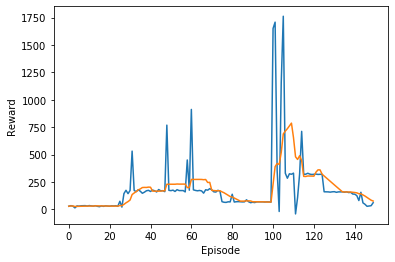

In [19]:
run_policy(agent, env) 

C:\Users\Alvaro\Desktop\Alvaro\Imperial College\MSc\Project\meta_robot\sandbox
